# 1. Data Ingestion

We load the additional libraries needed in this notebook:
* `seaborn`
* `matplotlib.pyplot`
* `scipy`

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


We will be only using the data for **Perth** location and  so we filter the dataset accordingly:

In [3]:
all_df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")

# Limit the dataset to Perth records
df = all_df[all_df["Location"] == "Perth"]
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
120638,2008-07-01,Perth,2.7,18.8,0.0,0.8,9.1,ENE,20.0,NaN,...,97.0,53.0,1027.6,1024.5,2.0,3.0,8.5,18.1,No,No
120639,2008-07-02,Perth,6.4,20.7,0.0,1.8,7.0,NE,22.0,ESE,...,80.0,39.0,1024.1,1019.0,0.0,6.0,11.1,19.7,No,No
120640,2008-07-03,Perth,6.5,19.9,0.4,2.2,7.3,NE,31.0,NaN,...,84.0,71.0,1016.8,1015.6,1.0,3.0,12.1,17.7,No,Yes
120641,2008-07-04,Perth,9.5,19.2,1.8,1.2,4.7,W,26.0,NNE,...,93.0,73.0,1019.3,1018.4,6.0,6.0,13.2,17.7,Yes,Yes
120642,2008-07-05,Perth,9.5,16.4,1.8,1.4,4.9,WSW,44.0,W,...,69.0,57.0,1020.4,1022.1,7.0,5.0,15.9,16.0,Yes,Yes
120643,2008-07-06,Perth,0.7,15.9,6.8,2.4,9.3,NNE,24.0,ENE,...,86.0,41.0,1032.0,1029.6,0.0,1.0,6.9,15.5,Yes,No
120644,2008-07-07,Perth,0.7,18.3,0.0,0.8,9.3,N,37.0,NE,...,72.0,36.0,1028.9,1024.2,1.0,5.0,8.7,17.9,No,No
120645,2008-07-08,Perth,3.2,20.4,0.0,1.4,6.9,NNW,24.0,NE,...,58.0,42.0,1023.9,1021.1,6.0,5.0,10.2,19.3,No,Yes
120646,2008-07-09,Perth,9.8,19.5,8.0,1.2,2.5,ESE,31.0,NaN,...,97.0,64.0,1026.4,1024.9,7.0,6.0,12.1,18.7,Yes,Yes
120647,2008-07-10,Perth,11.2,20.4,4.6,2.8,1.7,NNW,46.0,NE,...,79.0,50.0,1020.2,1014.0,7.0,7.0,13.4,19.0,Yes,Yes


# 2. Exploratory Data Analysis

📙 **SUMMARY**
* The dataset contains $3,193$ records and $23$ columns including the target variable.
* The features include both numerical and categorical values.

Let's see how many records and columns there are in the dataset.

In [4]:
print(f"Number of records: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of records: 3193
Number of columns: 23


What are the columns and their properties?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 120638 to 123830
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3193 non-null   object 
 1   Location       3193 non-null   object 
 2   MinTemp        3193 non-null   float64
 3   MaxTemp        3192 non-null   float64
 4   Rainfall       3193 non-null   float64
 5   Evaporation    3192 non-null   float64
 6   Sunshine       3188 non-null   float64
 7   WindGustDir    3188 non-null   object 
 8   WindGustSpeed  3188 non-null   float64
 9   WindDir9am     3059 non-null   object 
 10  WindDir3pm     3186 non-null   object 
 11  WindSpeed9am   3193 non-null   float64
 12  WindSpeed3pm   3192 non-null   float64
 13  Humidity9am    3184 non-null   float64
 14  Humidity3pm    3185 non-null   float64
 15  Pressure9am    3192 non-null   float64
 16  Pressure3pm    3192 non-null   float64
 17  Cloud9am       3191 non-null   float64
 18  C

🔖 The dataset has $23$ columns including the target variable (*RainTomorrow*):
* It consists of both numerical (`float64`) and categorical (`object`) features.
* Most of the columns have null values which requires addressing later 

# _2.1 Univariate Analysis


More details regarding the features can be found [on this website](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml).

# __2.1.1 RainTomorrow (Target)

📙 **SUMMARY**
* The target variable has two possible values: **Yes** and **No**.
* The dataset is **highly imbalanced**:
 * **Yes** - $645$ ($20.2\%$) records
 * **No** - $2,548$ ($79.8\%$) records

The target, *RainTomorrow*, is a categorical variable of either **Yes** or **No**.

In [6]:
target = df['RainTomorrow']
target.head(15)

120638     No
120639     No
120640    Yes
120641    Yes
120642    Yes
120643     No
120644     No
120645    Yes
120646    Yes
120647    Yes
120648    Yes
120649     No
120650     No
120651     No
120652    Yes
Name: RainTomorrow, dtype: object

Let's count the values for each prediction.

In [7]:
target_count = target.value_counts()

yes_percent = float(target_count['Yes'])/len(target) * 100
no_percent = float(target_count['No'])/len(target) * 100

print('Target (RainTomorrow) Values Count')
print(f" * Yes:\t{target_count['Yes']:5} ({yes_percent:.1f}%)")
print(f" * No:\t{target_count['No']:5} ({(no_percent):.1f}%)")

Target (RainTomorrow) Values Count
 * Yes:	  645 (20.2%)
 * No:	 2548 (79.8%)


The dataset is **highly imbalanced** with the **No** prediction being $4$x more than the **Yes** prediction.

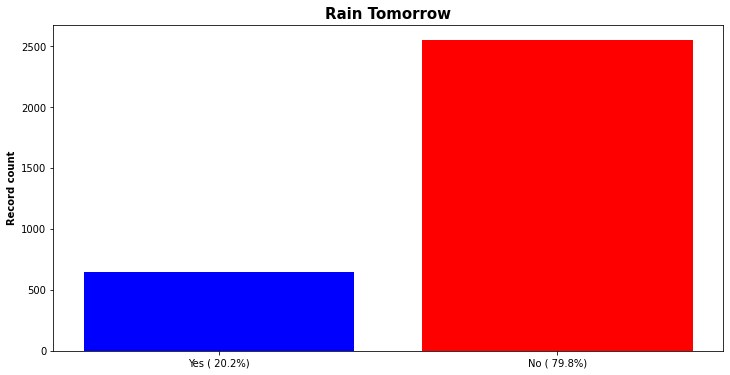

In [8]:
plt.figure(figsize=(12,6))
plt.title("Rain Tomorrow", fontweight="bold", fontsize=15)
plt.bar(f"Yes ({yes_percent: .1f}%)", target_count['Yes'], color="blue")
plt.bar(f"No ({no_percent: .1f}%)", target_count['No'], color="red")
plt.ylabel("Record count", fontweight="bold")
plt.show()

# __2.1.2 Date

📙 **SUMMARY**
* The *Date* attribute is a categorical feature denoting the date the record was taken.
* It has several missing values but are not important since this attribute is an identifying key.

The *Date* attribute is a categorical denoting the date the record was done.

The date ranges from `July 1, 2008` to `June 25, 2017`.

In [9]:
date_df = df[['Date']]
date_df.head(10)

,Date
120638,2008-07-01
120639,2008-07-02
120640,2008-07-03
120641,2008-07-04
120642,2008-07-05
120643,2008-07-06
120644,2008-07-07
120645,2008-07-08
120646,2008-07-09
120647,2008-07-10


In [10]:
print(f"Date range: {str(date_df.min().values[0])[:10]} - {str(date_df.max().values[0])[:10]}")

Date range: 2008-07-01 - 2017-06-25


There is a significant number of missing values over the years **2012** - **2014** just by visualizing the values. Upon further inspection, only $5$ years have been recorded completely while the remaining $5$ years hav missing records. 

array([[<AxesSubplot:title={'center':'Date'}>]], dtype=object)

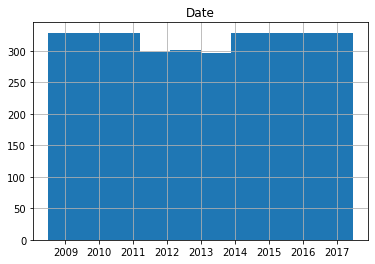

In [11]:
pd.DataFrame(pd.to_datetime(df['Date'])).hist()

In [12]:
date_df.groupby(pd.to_datetime(date_df['Date']).dt.year).count()

,Date
Date,
2008,184
2009,365
2010,365
2011,335
2012,335
2013,337
2014,365
2015,365
2016,366


# __2.1.3 Temperature Range

📙 **SUMMARY**
* The *MinTemp* and *MaxTemp* are continuous attributes denoting, respectively, the minimum and maximum temperature recorded throughout the day. It is in $^\circ C$.

* **MinTemp**
 * For *MinTemp* ranges from $-0.6 ^\circ C$ to $29.7 ^\circ C$ with a mean of $12.92 ^\circ C$ and a standard deviation of $5.09 ^\circ C$.
 * There are no missing values.
 * The distribution follows a normal distribution.
 * There are 2 right-end outliers.

* **MaxTemp**
 * The values range from $12.8 ^\circ C$ to $44.4 ^\circ C$ with a mean of $25.03 ^\circ C$ and a standar deviation of $6.12 ^\circ C$
 * There is only $1$ missing value.
 * The distribution is positively skewed with `skewness` = $0.58$.
 * There are 2 right-end outliers.

Let's extract information from and visualize the temperature features. The temperature is expressed in `$^\circ$C.

In [13]:
temp_df = df[['MinTemp','MaxTemp']]
temp_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
MinTemp,3193.0,12.922706,5.087817,-0.6,9.2,13.1,16.6,29.7
MaxTemp,3192.0,25.034837,6.115454,12.8,20.2,23.9,29.4,44.4


Let's revisit the missing values for the feature once again.

In [14]:
missing_min_temp = temp_df['MinTemp'].isna().sum()
missing_min_temp_perc = float(missing_min_temp)/len(temp_df['MinTemp'])
print(f"MinTemp missing values: {missing_min_temp} ({missing_min_temp_perc * 100:.2f}%)")

missing_max_temp = temp_df['MaxTemp'].isna().sum()
missing_max_temp_perc = float(missing_max_temp)/len(temp_df['MaxTemp'])
print(f"MaxTemp missing values: {missing_max_temp} ({missing_max_temp_perc * 100:.2f}%)")

MinTemp missing values: 0 (0.00%)
MaxTemp missing values: 1 (0.03%)


It seems like **MaxTemp** is negatively skewed. Let's compute the skewness for both features.

Note: The distribution is skewed is if it goes below $-0.5$ or beyond $0.5$.

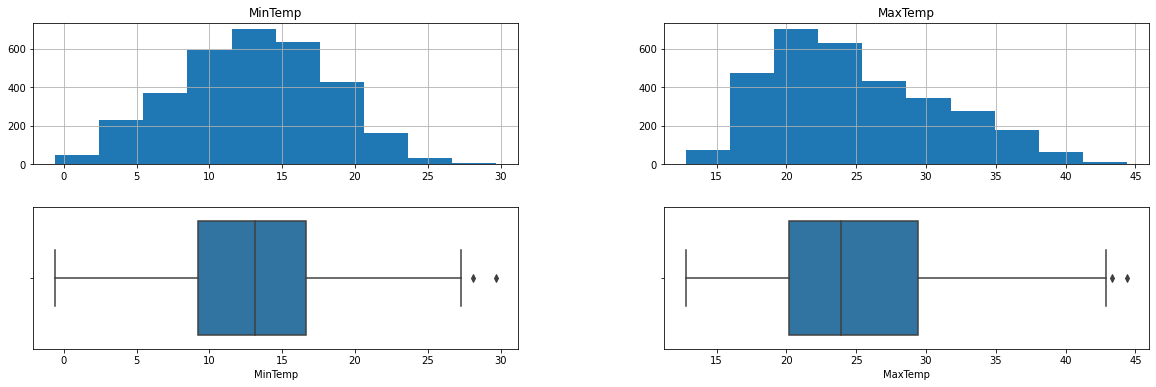

In [15]:
_, axes = plt.subplots(2, 2, figsize=(20, 6))

temp_df.hist(ax=axes[0])
sns.boxplot(ax=axes[1, 0], x=temp_df['MinTemp'])
sns.boxplot(ax=axes[1, 1], x=temp_df['MaxTemp'])

plt.show()

In [16]:
print(f"MinTemp skewness: {temp_df['MinTemp'].skew():.2f}")
print(f"MaxTemp skewness: {temp_df['MaxTemp'].skew():.2f}")

MinTemp skewness: -0.08
MaxTemp skewness: 0.58


In [17]:
# Create common method to identify outliers
def identify_outliers(df, column):
    no_missing = df[ ~df[column].isna() ][column]
    perc_75, perc_25 = np.percentile(no_missing, [75, 25])
    iqr = perc_75 - perc_25

    upper_boundary = perc_75 + (1.5 * iqr)
    high_outliers = no_missing[no_missing > upper_boundary]
    
    lower_boundary = perc_25 - (1.5 * iqr)
    low_outliers = no_missing[no_missing < lower_boundary]
    
    outliers = low_outliers.append(high_outliers)
    
    print(f"Number of outlier data points ({column}): {len(outliers)}")
    print(f"Unique value count: ({len(outliers.value_counts().keys().unique())} unique values)")
    print(f"Outliers counts:")
    for value, count in outliers.value_counts().items():
        print(f"  {value}", "\t", f"{count} occurrence(s)")


In [18]:
identify_outliers(temp_df, 'MinTemp')
identify_outliers(temp_df, 'MaxTemp')

Number of outlier data points (MinTemp): 2
Unique value count: (2 unique values)
Outliers counts:
  28.1 	 1 occurrence(s)
  29.7 	 1 occurrence(s)
Number of outlier data points (MaxTemp): 2
Unique value count: (2 unique values)
Outliers counts:
  43.3 	 1 occurrence(s)
  44.4 	 1 occurrence(s)


# __2.1.4 Rainfall

📙 **SUMMARY**
* The *Rainfall* variable is continuous. It represents the precipitation in the 24 hours to 9am and are expressed in **mm** and are rounded to the nearest $0.2 mm$.
* The values range from $0.0$ to $114.4$ with a mean of $1.91$ a standard deviation fo $5.79$.
* There are no missing values for the *Rainfall* attribute.
* The distribution is exponential.
* The dataset is dominated by $0.0$ values (more than $70\%$).


The attribute represents the precipitation within 24 hours and are expressed in **mm**. The values are in interleaved by $0.2$ units.

In [19]:
rainfall_df = df[['Rainfall']]
rainfall_df.head(10)

,Rainfall
120638,0.0
120639,0.0
120640,0.4
120641,1.8
120642,1.8
120643,6.8
120644,0.0
120645,0.0
120646,8.0
120647,4.6


The data ranges from $0.0$ to $114.4$ with a mean of $1.91$ and a standard deviation of $5.79$.

In [20]:
rainfall_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rainfall,3193.0,1.906295,5.78995,0.0,0.0,0.0,0.2,114.4


There are no missing values for the *Rainfall* attribute.

In [21]:
missing_rainfall_count = rainfall_df.isna().sum()
missing_rainfall_perc = rainfall_df.isna().sum() / float(len(rainfall_df))

print(f"Missing Rainfall values: {missing_rainfall_count['Rainfall']} ({missing_rainfall_perc['Rainfall'] * 100:.2f}%)")

Missing Rainfall values: 0 (0.00%)


The *Rainfall* data follows the exponential distribution, making it positively skewed.

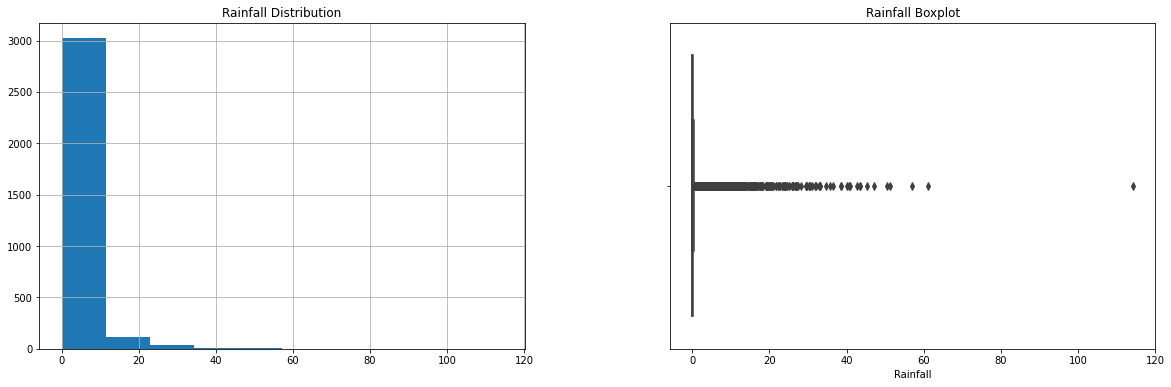

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

rainfall_df.hist(ax=axes[0])
axes[0].set_title("Rainfall Distribution")

sns.boxplot(ax=axes[1], x=rainfall_df['Rainfall'])
axes[1].set_title("Rainfall Boxplot")

plt.show()

In [23]:
skewness = rainfall_df.skew()

print(f"Skewness of Rainfall: {skewness['Rainfall']:.2f}")

Skewness of Rainfall: 6.14


In the dataset, the value $0.0$ comprises more than $70\%$ of the the dataset.

In [24]:
print("Top 10 Rainfall value occurences:")
value_count_perc = rainfall_df.value_counts()/len(rainfall_df)
value_count_perc.sort_values(ascending=False, inplace=True)
value_count_perc.iloc[:10]

Top 10 Rainfall value occurences:


Rainfall
0.0         0.718133
0.2         0.033824
0.4         0.016599
0.6         0.011588
0.8         0.009396
1.2         0.009082
1.0         0.008456
2.6         0.006264
1.6         0.005951
2.2         0.005637
dtype: float64

# __2.1.5 Evaporation

📙 **SUMMARY**
* The *Evaporation* attribute denotes the evaporation level using the standard *Class A Evaporation Pan* wihtin $24$ hours. The values are expressed in **mm** and rounded to the nearest $0.2 mm$.
* The actual values range from $0.0$ to $17.0$ with a mean of $5.61$ and a standard deviation of $3.42$ hours.
* There is only $1$ missing value for this attribute.
* The distribution is positively skewed at `skewness` = $0.54$.
* There is $1$ right-end outlier value in the dataset: $17.0$.

The *Evaporation* data represents the evaporation level in **mm** measured using the standard *Class A Evaporation Pan* within $24$ hours from 9AM. The values are rounded up to the nearest $0.2$ mm.

In [25]:
evap_df = df[['Evaporation']]
evap_df.head(10)

,Evaporation
120638,0.8
120639,1.8
120640,2.2
120641,1.2
120642,1.4
120643,2.4
120644,0.8
120645,1.4
120646,1.2
120647,2.8


The values range from $0.0$ to $17.0$. It has a mean of $5.61$ and a standard deviation of $3.42$ hours.

In [26]:
evap_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Evaporation,3192.0,5.606579,3.422893,0.0,2.6,4.8,8.2,17.0


There's only $1$ missing value for the *Evaporation* attribute.

In [27]:
missing_evap_count = evap_df.isna().sum()
missing_evap_perc = missing_evap_count / len(evap_df)

print(f"Missing evaporation values: {missing_evap_count['Evaporation']} ({missing_evap_perc['Evaporation'] * 100:.2f}%)")

Missing evaporation values: 1 (0.03%)


The values range from $0.0$ to $17.0$ with a mean of $5.61$ and a standard deviation of $3.42$.

The data is positively skewed with `skewness` = $0.54$. 

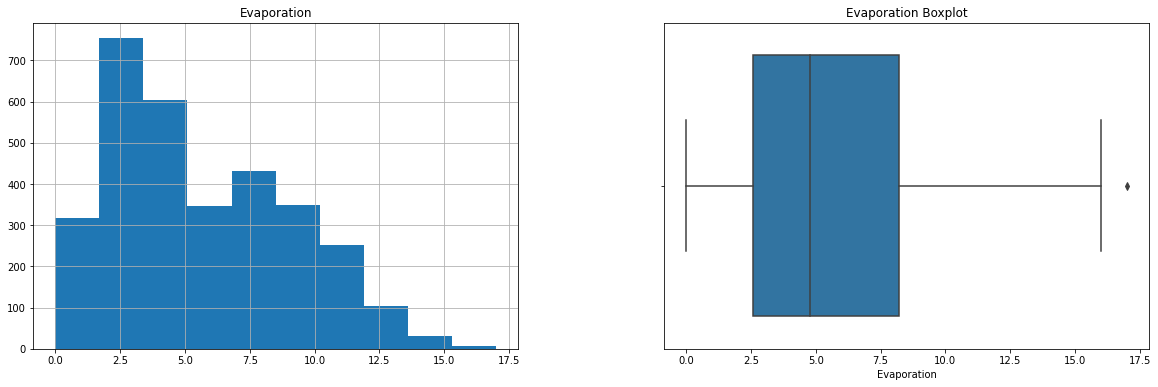

In [28]:
_, axes = plt.subplots(1, 2, figsize=(20, 6))

plt.title("Evaporation Distribution")
evap_df.hist(ax=axes[0])

plt.title("Evaporation Boxplot")
sns.boxplot(ax=axes[1], x=evap_df['Evaporation'])

plt.show()

In [29]:
evap_skewness = evap_df.skew()

print(f"Skewness of Evaporation: {evap_skewness['Evaporation']:.2f}")

Skewness of Evaporation: 0.54


There is only $1$ outlier in the dataset: $17.0$.

In [30]:
identify_outliers(evap_df, 'Evaporation')

Number of outlier data points (Evaporation): 1
Unique value count: (1 unique values)
Outliers counts:
  17.0 	 1 occurrence(s)


# __2.1.6 Sunshine


📙 **SUMMARY**
* The attribute is expressed in terms of number of hours within $24$ hours. Ergo, the value is capped between $0$ - $24$ hours.
* The data has a mean of $8.78$ with a standard deviation of $3.47$.
* There are $5$ missing values in the dataset.
* The distribution is negatively skewed at `skewness` = $-0.74$.

The *Sunshine* attribute represents the number of hours with bright sunshine within 24 hours. Ergo, the value is capped at $24$ hours.

In [31]:
sunshine_df = df[['Sunshine']]
pd.DataFrame(sunshine_df).head(10)

,Sunshine
120638,9.1
120639,7.0
120640,7.3
120641,4.7
120642,4.9
120643,9.3
120644,9.3
120645,6.9
120646,2.5
120647,1.7


There are $5$ missing values for *Sunshine* values.

In [32]:
missing_sunshine_values = sunshine_df.isna().sum()
missing_sunshine_values_perc = missing_sunshine_values / len(sunshine_df)

print(f"Missing Sunshine values: {missing_sunshine_values['Sunshine']} ({missing_sunshine_values_perc['Sunshine'] * 100:.2f}%)")

Missing Sunshine values: 5 (0.16%)


The values range from $0.0$ to $13.0$ with a mean of $8.78$ and a standard deviation of $3.47$.

In [33]:
sunshine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sunshine,3188.0,8.784536,3.46685,0.0,6.6,9.4,11.5,13.9


The data is negatively skewed with `skewness` = $-0.74$. There are no outliers in the dataset.

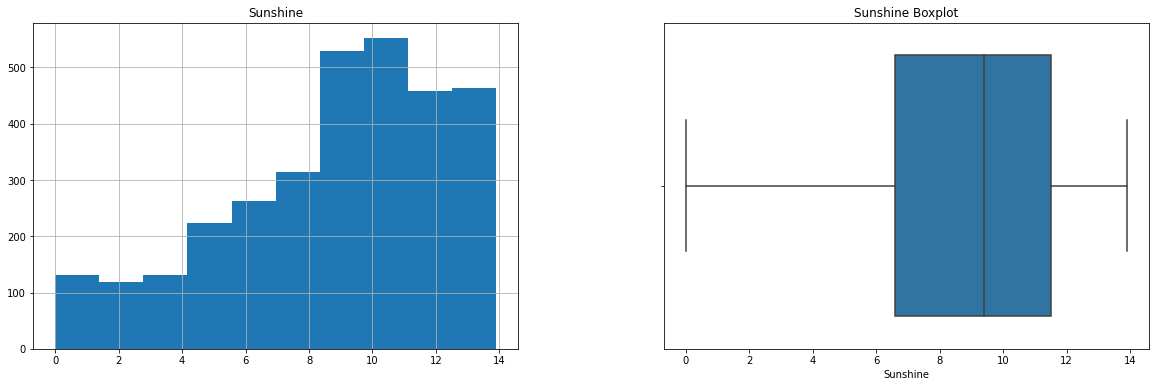

In [34]:
_, axes = plt.subplots(1, 2, figsize=(20,6))

plt.title("Sunshine Distribution")
sunshine_df.hist(ax=axes[0])

plt.title("Sunshine Boxplot")
sns.boxplot(x=sunshine_df['Sunshine'])

plt.show()

In [35]:
sunshine_skewness = sunshine_df.skew()

print(f"Skewness of the dataset: {sunshine_skewness['Sunshine']:.2f}")

Skewness of the dataset: -0.74


# __2.1.7 WindGustDir


📙 **SUMMARY**
* The *WindGustDir* denotes the direction of the stronged wind gust throughout the day. It is expressed based on the $16$ compass points (**N**, **NE**, **NNE**, **ENE**, etc.).
* There are $5$ missing values for the dataset.
* The most frequent direction is *SW* ($22.8\%$) followed by *WSW* ($15.0\%$).

In [36]:
wind_gust_dir_df = df['WindGustDir']
wind_gust_dir_df.head(10)

120638    ENE
120639     NE
120640     NE
120641      W
120642    WSW
120643    NNE
120644      N
120645    NNW
120646    ESE
120647    NNW
Name: WindGustDir, dtype: object

There are $5$ missing values for *WindGustDir*.

In [37]:
missing_windgust_count = wind_gust_dir_df.isna().sum()
missing_windgust_perc = missing_windgust_count / len(wind_gust_dir_df)

print(f"WindGustDir missing values: {missing_windgust_count} ({missing_windgust_perc*100:.2f}%)")

WindGustDir missing values: 5 (0.16%)


The most occuring direction is **SW** at $22.8\%$.

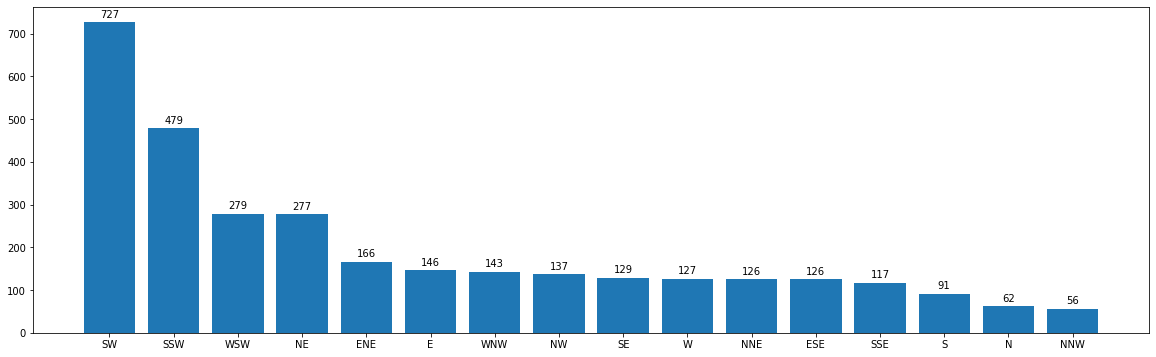

In [38]:
wind_gust_dir_count = wind_gust_dir_df.value_counts()
wind_gust_dir_count_df = pd.DataFrame(wind_gust_dir_count)
wind_gust_dir_count_df.rename(columns={'WindGustDir': 'count'}, inplace=True)
wind_gust_dir_count_df['percent'] = wind_gust_dir_count_df['count']/ wind_gust_dir_count_df['count'].sum()
wind_gust_dir_count_df

_, ax = plt.subplots(figsize=(20,6))
p = ax.bar(wind_gust_dir_count_df.index, wind_gust_dir_count_df['count'])
ax.bar_label(p, labels=wind_gust_dir_count_df['count'], padding=3)
plt.show()

In [39]:
wind_gust_dir_count_df

,count,percent
SW,727,0.228043
SSW,479,0.150251
WSW,279,0.087516
NE,277,0.086888
ENE,166,0.052070
E,146,0.045797
WNW,143,0.044856
NW,137,0.042974
SE,129,0.040464
W,127,0.039837


# __2.1.8 WindGustSpeed

📙 **SUMMARY**
* The *WindGustSpeed* denotes the strongest wind speed within $24$ hours and is expressed in **km/hr**. The values are rounded to the nearest whole number.
* The values range from $11.0$ to $83.0$ with a mean of $34.88$ and a standard deviation of $9.41 km/hr$. 
* There are $5$ missing values in the dataset.
* The distribution is positively skewed at `skewness` = $0.65$.
* There are $49$ outliers in the dataset.

The *WindGustSpeed* represents the speed of the strongest wind speed within 24 hours and expressed in **km/hr**.

In [40]:
wind_gust_speed_df = df[['WindGustSpeed']]
wind_gust_speed_df.head(10)

,WindGustSpeed
120638,20.0
120639,22.0
120640,31.0
120641,26.0
120642,44.0
120643,24.0
120644,37.0
120645,24.0
120646,31.0
120647,46.0


The *WindGustSpeed* values range from $11.0$ - $83.0$ with a mean of $34.88$ and a standard deviation of $9.41$.

In [41]:
wind_gust_speed_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WindGustSpeed,3188.0,34.882999,9.411943,11.0,28.0,35.0,41.0,83.0


There are $5$ ($0.16\%$) missing values for *WindGustSpeed* dataset.

In [42]:
missing_wind_gust_speed = wind_gust_speed_df.isna().sum()
missing_wind_gust_speed_perc = missing_wind_gust_speed / len(wind_gust_speed_df)

print(f"Missing wind gust speed values: {missing_wind_gust_speed['WindGustSpeed']} ({missing_wind_gust_speed_perc['WindGustSpeed'] * 100:.2f}%)")

Missing wind gust speed values: 5 (0.16%)


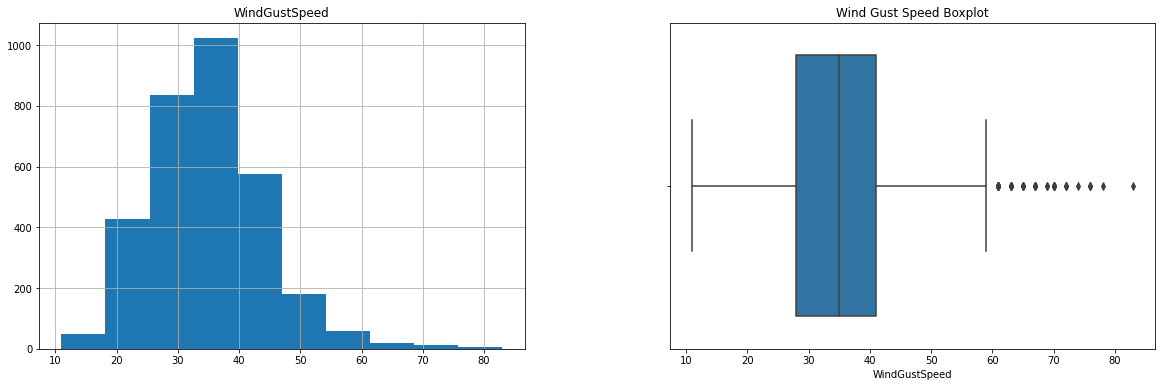

In [43]:
_, axes = plt.subplots(1, 2, figsize=(20, 6))

plt.title("Wind Gust Speed Distribution")
wind_gust_speed_df.hist(ax=axes[0])

plt.title("Wind Gust Speed Boxplot")
sns.boxplot(ax=axes[1], x=wind_gust_speed_df['WindGustSpeed'])

plt.show()

The data distribution is positively skewed with `skewness` = $0.65$.

In [44]:
wind_gust_speed_skewness = wind_gust_speed_df.skew()

print(f"Wind Gust Speed Skewness: {wind_gust_speed_skewness['WindGustSpeed']:.2f}")

Wind Gust Speed Skewness: 0.65


There are $49$ outlier values in the dataset.

In [45]:
identify_outliers(wind_gust_speed_df, 'WindGustSpeed')

Number of outlier data points (WindGustSpeed): 49
Unique value count: (11 unique values)
Outliers counts:
  61.0 	 14 occurrence(s)
  63.0 	 7 occurrence(s)
  67.0 	 6 occurrence(s)
  70.0 	 6 occurrence(s)
  65.0 	 5 occurrence(s)
  76.0 	 3 occurrence(s)
  72.0 	 3 occurrence(s)
  69.0 	 2 occurrence(s)
  74.0 	 1 occurrence(s)
  83.0 	 1 occurrence(s)
  78.0 	 1 occurrence(s)


# __2.1.9WindDir

📙 **SUMMARY**
* The *WindDir9am* and *WinDir3pm* is categorical denoting the direction of the wind at 9AM and 3PM respectively. The values are expressed according to the 16 compass points.

* **WindDir9am**
 * The dataset contains $134$ ($4.20\%$) missing values.

* **WindDir3pm**
 * The dataset contains $7$ ($0.22\%$) missing values.
 * The values range from $11.0$ to $83.0$ with a mean of $34.88$ and a standard deviation of $9.41 km/hr$. 
 * There are $5$ missing values in the dataset.
 * The distribution is positively skewed at `skewness` = $0.65$.
 * There are $49$ outliers in the dataset.

The data on both *WindDir9am* and *WindDir3pm* consists of the $16$ compass points.

In [46]:
wind_dir_df = df[['WindDir9am', 'WindDir3pm']]
wind_dir_df.head(10)

,WindDir9am,WindDir3pm
120638,NaN,E
120639,ESE,ENE
120640,NaN,WNW
120641,NNE,NNW
120642,W,SW
120643,ENE,NE
120644,NE,NNE
120645,NE,N
120646,NaN,ESE
120647,NE,NNE


The *WindDir9am* has $134$ missing values (quite a handful), while *WindDir3pm* only has $7$ missing values.

In [47]:
wind_dir_missing_count = wind_dir_df.isna().sum()
wind_dir_missing_perc = wind_dir_missing_count/len(wind_dir_df)

print(f"WindDir9am missing values: {wind_dir_missing_count['WindDir9am']} ({wind_dir_missing_perc['WindDir9am']*100:.2f}%)")
print(f"WindDir3pm missing values: {wind_dir_missing_count['WindDir3pm']} ({wind_dir_missing_perc['WindDir3pm']*100:.2f}%)")


WindDir9am missing values: 134 (4.20%)
WindDir3pm missing values: 7 (0.22%)


The top three frequent directions for *WindDir9am* are **E** ($15.7\%$), **NE** ($11.6\%$), and **ENE** ($13.2\%$).

The leading direction for *WindDir3pm* us **SW** ($21.5\%$).

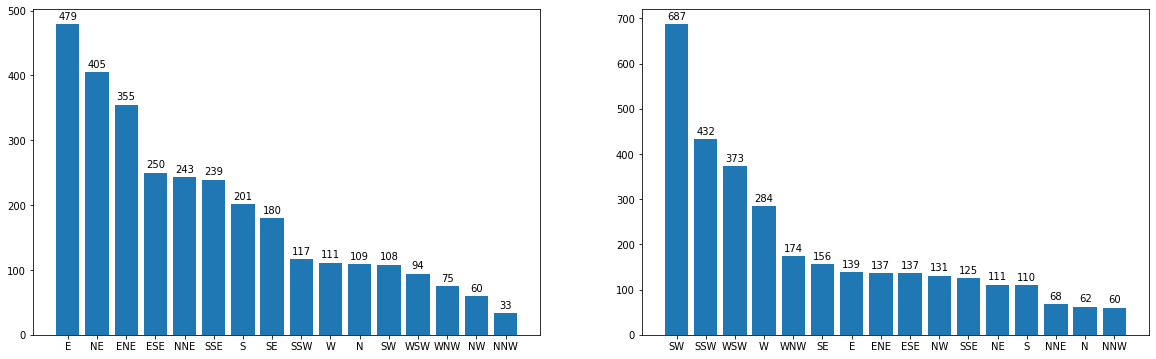

In [48]:
wind_dir_9am_count = wind_dir_df['WindDir9am'].value_counts()
wind_dir_9am_count = pd.DataFrame({'direction': wind_dir_9am_count.keys(), '9amCount': wind_dir_9am_count.values})
wind_dir_9am_count.set_index('direction', inplace=True)
wind_dir_9am_count

wind_dir_3pm_count = wind_dir_df['WindDir3pm'].value_counts()
wind_dir_3pm_count = pd.DataFrame({'direction': wind_dir_3pm_count.keys(), '3pmCount': wind_dir_3pm_count.values})
wind_dir_3pm_count.set_index('direction', inplace=True)
wind_dir_3pm_count

wind_dir_count_df = wind_dir_9am_count.join(wind_dir_3pm_count)

_, ax = plt.subplots(1, 2, figsize=(20, 6))

bar_9am = ax[0].bar(wind_dir_count_df.index, wind_dir_count_df['9amCount'])
ax[0].bar_label(bar_9am, wind_dir_count_df['9amCount'], padding=3)


sorted_3pm_df = wind_dir_count_df.sort_values('3pmCount', ascending=False)
bar_3pm = ax[1].bar(sorted_3pm_df.index, sorted_3pm_df['3pmCount'])
ax[1].bar_label(bar_3pm, sorted_3pm_df['3pmCount'], padding=3)
plt.show()

In [49]:
wind_dir_count_df['9amPercent'] = wind_dir_count_df['9amCount'] / wind_dir_count_df['9amCount'].sum()
wind_dir_count_df['3pmPercent'] = wind_dir_count_df['3pmCount'] / wind_dir_count_df['3pmCount'].sum()
wind_dir_count_df

,9amCount,3pmCount,9amPercent,3pmPercent
direction,,,,
E,479,139,0.156587,0.043628
NE,405,111,0.132396,0.034840
ENE,355,137,0.116051,0.043001
ESE,250,137,0.081726,0.043001
NNE,243,68,0.079438,0.021343
SSE,239,125,0.078130,0.039234
S,201,110,0.065708,0.034526
SE,180,156,0.058843,0.048964
SSW,117,432,0.038248,0.135593


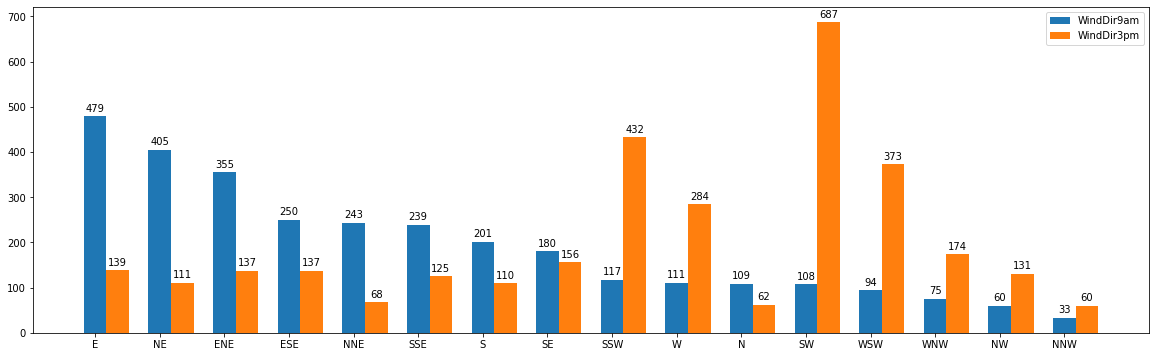

In [50]:
fig, ax = plt.subplots(figsize=(20, 6))

X = np.arange(16)

rects1 = ax.bar(X, wind_dir_count_df['9amCount'], width=0.35, label='WindDir9am')
rects2 = ax.bar(X + .35, wind_dir_count_df['3pmCount'], width=0.35, label='WindDir3pm')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
plt.xticks(X, wind_dir_count_df.index)
plt.legend()
plt.show()

# __2.1.10 WindSpeed


📙 **SUMMARY**
* The *WindSpeed9am* and **WindSpeed3pm** denotest the wind speed at 9AM and 3PM respectively and is expressed in **km/hr** rounded to the nearest whole number.

* **WindSpeed9am**
    * The values range from $0.0$ km/hr to $30.0$ km/hr with a mean of $10.69$ km/hr and a standard deviation of $5.06$ km/hr.
    * There are no missing values in the dataset.
    * The distribution is normal and symmetric.
    * There are $5$ outlier data points on the *WindSpeed9am* dataset.
* **WindSpeed3pm**
    * The values range from $0.0$ km/hr to $31.0$ km/hr with a mean of $14.52$ km/hr and a standard deviation of $5.14$ km/hr.
    * There is only $1$ missing value for *WindSpeed3pm*.
    * The distribution is normal and symmetric.
    * There are no outliers in this dataset.

The average wind speed data over $10$ minutes prior to `9AM` (*WindSpeed9am*) and over $10$ minutes prior to `3PM` (*WindSpeed3pm*). The values are expressed in **km/hr**.

In [51]:
wind_speed_df = df[['WindSpeed9am', 'WindSpeed3pm']]
wind_speed_df.head(10)

,WindSpeed9am,WindSpeed3pm
120638,0.0,7.0
120639,6.0,9.0
120640,0.0,4.0
120641,11.0,6.0
120642,13.0,17.0
120643,4.0,7.0
120644,15.0,13.0
120645,9.0,13.0
120646,0.0,9.0
120647,19.0,11.0


For *WindSpeed9am*, the values range from $0.0$ to $30.0$ with a mean of $10.69 km/hr$ and a standard deviation of $5.06 km/hr$. For *WindSpeed3pm*, the values range from $0.0$to $31.0$ with a mean of $14.52 km/hr$ and a standard deviation of $5.14 km/hr$.

In [52]:
wind_speed_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WindSpeed9am,3193.0,10.693392,5.056102,0.0,7.0,11.0,15.0,30.0
WindSpeed3pm,3192.0,14.519737,5.139446,0.0,11.0,15.0,19.0,31.0


There are no missing values for *MissingWindSpeed9am* and only $1$ missing value for *WindSpeed3pm*.

In [53]:
missing_wind_speed_count = wind_speed_df.isna().sum()
missing_wind_speed_perc = missing_wind_speed_count / len(wind_speed_df)

print(f"Missing WindSpeed9am: {missing_wind_speed_count['WindSpeed9am']} ({(missing_wind_speed_perc['WindSpeed9am'] * 100):.2f}%)")
print(f"Missing WindSpeed3pm: {missing_wind_speed_count['WindSpeed3pm']} ({(missing_wind_speed_perc['WindSpeed3pm'] * 100):.2f}%)")

Missing WindSpeed9am: 0 (0.00%)
Missing WindSpeed3pm: 1 (0.03%)


Both datasets follows the normal distribution and are roughly symmetric.The *WindSpeed9am* attribute has $5$ outlier data points whille the *WindSpeed3on* has none.

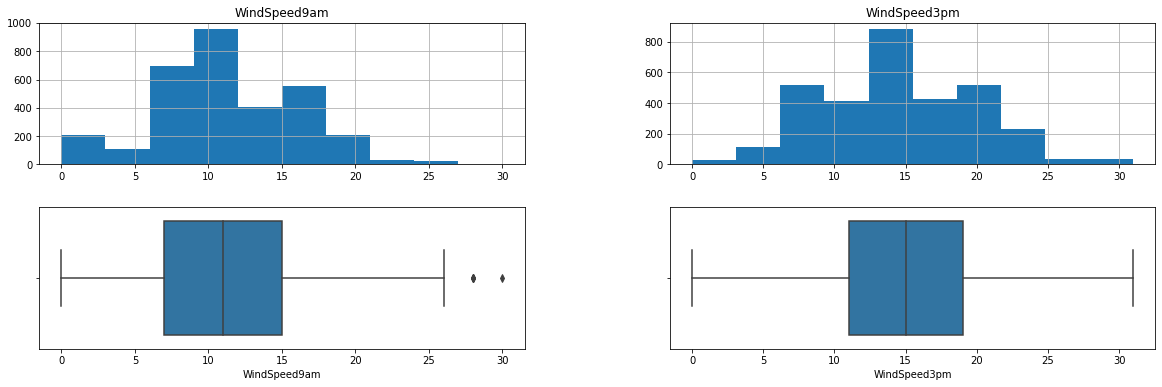

In [54]:
_, axes = plt.subplots(2,2,figsize=(20,6))

wind_speed_df.hist(ax=axes[0])

sns.boxplot(ax=axes[1,0], x=wind_speed_df['WindSpeed9am'])
sns.boxplot(ax=axes[1,1], x=wind_speed_df['WindSpeed3pm'])
plt.show()

In [55]:
wind_speed_df_skewness = wind_speed_df.skew()

print(f"WindSpeed9am skewness: {wind_speed_df_skewness['WindSpeed9am']:.2f}")
print(f"WindSpeed3pm skewness: {wind_speed_df_skewness['WindSpeed3pm']:.2f}")

WindSpeed9am skewness: 0.15
WindSpeed3pm skewness: 0.17


There $5$ outlier data points for *WindSpeed9am** but no outliers for *WindSpeed3pm*

In [56]:
identify_outliers(wind_speed_df, 'WindSpeed9am')
identify_outliers(wind_speed_df, 'WindSpeed3pm')

Number of outlier data points (WindSpeed9am): 5
Unique value count: (2 unique values)
Outliers counts:
  28.0 	 4 occurrence(s)
  30.0 	 1 occurrence(s)
Number of outlier data points (WindSpeed3pm): 0
Unique value count: (0 unique values)
Outliers counts:


# __2.1.11 Humidity

📙 **SUMMARY**
* The *Humidity9am* and *Humidity3pm*  is expressed in **%** rounded to the nearest whole number. As with percentage, the data is capped from $0.0$ - $100.0$.

* **Humdity9am**
    * The actual values range from$13.0\%$ to $99.0\%$ with a mean of $62.69\%$ and a standard deviation of $17.57\%$.
    * There are $9$ ($0.28\%$) missing values in the dataset.
    * The data is normally distributed.
    * There are $5$ left-end outliers in the dataset.
    
* **Humidity3pm**
    * The actual values range from$6.0\%$ to $97.0\%$ with a mean of $46.91\%$ and a standard deviation of $16.58\%$.
    * There are $8$ ($0.25\%$) missing values in the dataset.
    * The data is positively skewed with `skewness` = $0.266$.
    * There are $49$ right-end outliers in the dataset.
    

The humidity data is expressed in percent and is rounded to the nearest whole number.

In [57]:
humidity_df = df[['Humidity9am', 'Humidity3pm']]

humidity_df.head(10)

,Humidity9am,Humidity3pm
120638,97.0,53.0
120639,80.0,39.0
120640,84.0,71.0
120641,93.0,73.0
120642,69.0,57.0
120643,86.0,41.0
120644,72.0,36.0
120645,58.0,42.0
120646,97.0,64.0
120647,79.0,50.0


For *Humidity9am*, the data ranges from $13.0\%$ to $99.0\%$ with a mean of $62.69\%$ and a standard deviation of $17.57\%$.

For *Humidity3pm*, the data ranges from $6.0\%$ to $97.0\%$ with a mean of $46.91\%$ and a standard deviation of $16.58%$.

In [58]:
humidity_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Humidity9am,3184.0,62.688128,17.575342,13.0,50.75,61.0,75.0,99.0
Humidity3pm,3185.0,46.906122,16.578359,6.0,36.00,47.0,57.0,97.0


There are $9$ ($0.28\%$) missing vallues for *Humidity9am*, and $8$ ($0.25\%$) missing values for *Humidity3pm*.

In [59]:
missing_humidity_count = humidity_df.isna().sum()
missing_humidity_perc = missing_humidity_count / len(humidity_df)

print(f"Humidity9am missing values: {missing_humidity_count['Humidity9am']} ({missing_humidity_perc['Humidity9am']*100:.2f}%)")
print(f"Humidity3pm missing values: {missing_humidity_count['Humidity3pm']} ({missing_humidity_perc['Humidity3pm']*100:.2f}%)")

Humidity9am missing values: 9 (0.28%)
Humidity3pm missing values: 8 (0.25%)


Both datasets are normally distributed. The *Humidity3pm* dataset is slightly positively skewed at `skewness`= $0.266$ with $49$ outlier data points.

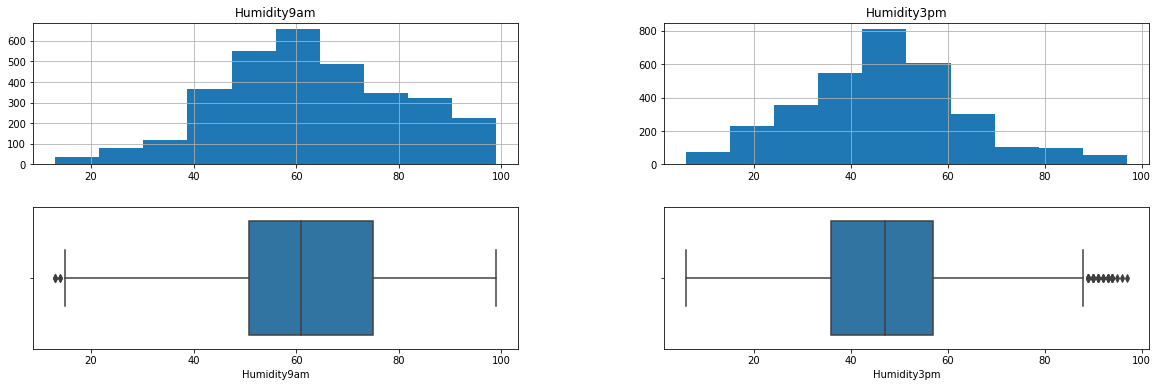

In [60]:
_, axes = plt.subplots(2, 2, figsize=(20,6))

humidity_df.hist(ax=axes[0])

sns.boxplot(ax=axes[1,0], x=humidity_df['Humidity9am'])
sns.boxplot(ax=axes[1,1], x=humidity_df['Humidity3pm'])

plt.show()

In [61]:
humidity_skewness = humidity_df.skew()

print(f"Humidity9am skewness: {humidity_skewness['Humidity9am']:.3f}")
print(f"Humidity3pm skewness: {humidity_skewness['Humidity3pm']:.3f}")

Humidity9am skewness: -0.002
Humidity3pm skewness: 0.266


For *Humidity9am*, there are $5$ outlier data points with $2$ unique values.

For *Humidity3pm*, there are $49$ outlier data points with $9$ unique values.

In [62]:
identify_outliers(humidity_df, 'Humidity9am')
identify_outliers(humidity_df, 'Humidity3pm')

Number of outlier data points (Humidity9am): 5
Unique value count: (2 unique values)
Outliers counts:
  13.0 	 3 occurrence(s)
  14.0 	 2 occurrence(s)
Number of outlier data points (Humidity3pm): 49
Unique value count: (9 unique values)
Outliers counts:
  90.0 	 10 occurrence(s)
  94.0 	 9 occurrence(s)
  89.0 	 9 occurrence(s)
  93.0 	 7 occurrence(s)
  91.0 	 7 occurrence(s)
  92.0 	 4 occurrence(s)
  97.0 	 1 occurrence(s)
  96.0 	 1 occurrence(s)
  95.0 	 1 occurrence(s)


# __2.1.12 Pressure

📙 **SUMMARY*** 
* The *Pressure9am* and *Pressure3pm* refers to the pressure quantity at their respective time and are expressed in hectopascals and are rounded to the nearest tenth of a decimal.

* **Presure9am**
    * The values range from $996.2$ to $1038.8$ hectopascals with a mean of $1017.78$ hectopascals and a standard deviation of $6.52$ hectopascals.
    * There is 1 missing value.
    * The data distribution is normal and symmetric.
    * There are $11$ outliers in the dataset.

* **Pressure3pm**
    * The values range from $991.9$ to $1034.3$ hectopascals with a mean of $1015.42$ hectopascals and a standard deviation of $6.12$ hectopascals.
    * There is 1 missing value.
    * The data distribution is normal and symmetric.
    * There are $8$ outliers in the dataset.

The data refers to the atmospheric pressure at sea level in **hectopascals** and are rounded to the neearest tenths of a decimal.

In [63]:
pressure_df = df[['Pressure9am', 'Pressure3pm']]
pressure_df.head(10)

,Pressure9am,Pressure3pm
120638,1027.6,1024.5
120639,1024.1,1019.0
120640,1016.8,1015.6
120641,1019.3,1018.4
120642,1020.4,1022.1
120643,1032.0,1029.6
120644,1028.9,1024.2
120645,1023.9,1021.1
120646,1026.4,1024.9
120647,1020.2,1014.0


For *Pressure9am*, the values range from $996.2$ to $1038.8$ with a mean of $1017.78$ and a standard deviation of $6.52$ hectopascals.

For *Pressure3pm*, the values range from $991.9$ to $1034.3$ with a mean of $1015.42$ and a standard deviation of $6.12$ hectopascals.

In [64]:
pressure_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pressure9am,3192.0,1017.784398,6.52324,996.2,1013.1,1017.4,1022.3,1038.8
Pressure3pm,3192.0,1015.420457,6.12160,991.9,1011.0,1015.1,1019.7,1034.3


Both pressure datasets have $1$ missing value.

In [65]:
missing_pressure_count = pressure_df.isna().sum()
missing_pressure_perc = missing_pressure_count / len(pressure_df)


print(f"Pressure9am missing values: {missing_pressure_count['Pressure9am']} ({missing_pressure_perc['Pressure9am']*100:.2f}%)")
print(f"Pressure3pm missing values: {missing_pressure_count['Pressure3pm']} ({missing_pressure_perc['Pressure3pm']*100:.2f}%)")

Pressure9am missing values: 1 (0.03%)
Pressure3pm missing values: 1 (0.03%)


Both datasets seem to be following the normal distribution and symmetric.

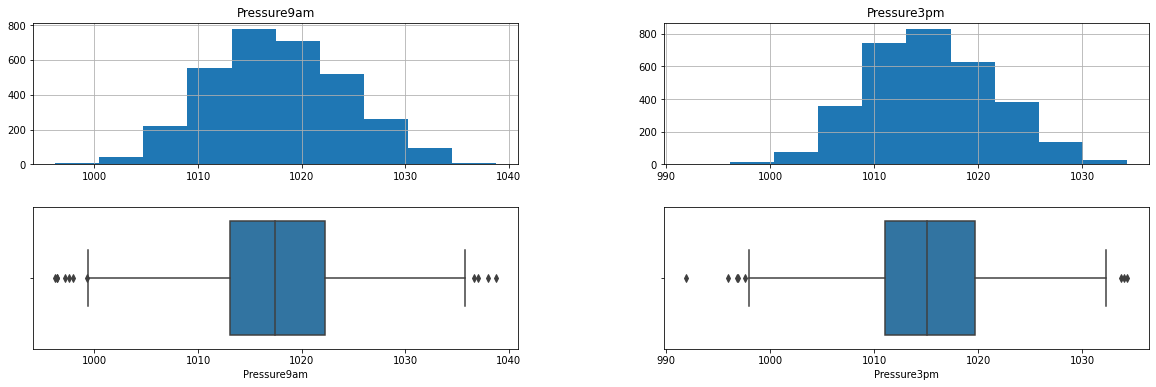

In [66]:
_, axes = plt.subplots(2, 2, figsize=(20, 6))

pressure_df.hist(ax=axes[0])
sns.boxplot(ax=axes[1, 0], x=pressure_df['Pressure9am'])
sns.boxplot(ax=axes[1, 1], x=pressure_df['Pressure3pm'])

plt.show()

In [67]:
pressure_skewness = pressure_df.skew()

print(f"Pressure9am skewness: {pressure_skewness['Pressure9am']: .2f}")
print(f"Pressure3pm skewness: {pressure_skewness['Pressure3pm']: .2f}")

Pressure9am skewness:  0.13
Pressure3pm skewness:  0.15


The *Pressure9am* has $11$ outlier points with $10$ unique values while *Pressure3pm* has $8$ outlier points, each with different values.

In [68]:
identify_outliers(pressure_df, 'Pressure9am')
identify_outliers(pressure_df, 'Pressure3pm')

Number of outlier data points (Pressure9am): 11
Unique value count: (10 unique values)
Outliers counts:
  996.4 	 2 occurrence(s)
  999.3 	 1 occurrence(s)
  997.5 	 1 occurrence(s)
  997.2 	 1 occurrence(s)
  997.9 	 1 occurrence(s)
  996.2 	 1 occurrence(s)
  1038.0 	 1 occurrence(s)
  1037.0 	 1 occurrence(s)
  1038.8 	 1 occurrence(s)
  1036.7 	 1 occurrence(s)
Number of outlier data points (Pressure3pm): 8
Unique value count: (8 unique values)
Outliers counts:
  996.9 	 1 occurrence(s)
  996.8 	 1 occurrence(s)
  997.6 	 1 occurrence(s)
  995.9 	 1 occurrence(s)
  991.9 	 1 occurrence(s)
  1034.3 	 1 occurrence(s)
  1033.7 	 1 occurrence(s)
  1034.0 	 1 occurrence(s)


# __2.1.13 Cloud

📙 **SUMMARY**
* The *Cloud9am* and *Cloud3pm* data represents the fraction of the sky that's covered with clouds at their respective times and is expressed in $\frac{1}{8}$ units.
* The values are discrete and are capped from $0$ to $8$.

* **Cloud9am**
    * The values range from $0$ to $8$ with a standar deviation of $3.38$ and a standard deviation of $2.80$.
    * There are $2$ missing values in the dataset.
    * The most occuring value is $1$.

* **Cloud3pm**
    * The values range from $0$ to $8$ with a standar deviation of $3.47$ and a standard deviation of $2.68$.
    * There are $4$ missing values in the dataset.
    * The most occuring value is $1$.
    

The dataset refers to the fraction of the sky obscured by cloud at 3pm and is expressed in $\frac{1}{8}$ unit. Hence, the values are integral values (despite the float data type) from $0$ to $8$.

In [69]:
cloud_df = df[['Cloud9am', 'Cloud3pm']]
cloud_df.head(10)

,Cloud9am,Cloud3pm
120638,2.0,3.0
120639,0.0,6.0
120640,1.0,3.0
120641,6.0,6.0
120642,7.0,5.0
120643,0.0,1.0
120644,1.0,5.0
120645,6.0,5.0
120646,7.0,6.0
120647,7.0,7.0


For both datasets, the values range from $0.0$ to $8.0$. For *Cloud9am*, the mean is $3.38$ with a standard deviation of $2.80$ while for *Cloud3pm*, the mean is $3.47$ and a standard deviation of $2.68$.

In [70]:
cloud_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cloud9am,3191.0,3.383579,2.800834,0.0,1.0,3.0,6.0,8.0
Cloud3pm,3189.0,3.469740,2.681804,0.0,1.0,3.0,6.0,8.0


For *Cloud9am*, there are $2$ missing values while *Cloud3pm* has $4$ missing values.

In [71]:
missing_cloud_count = cloud_df.isna().sum()
missing_cloud_perc = missing_cloud_count / len(cloud_df)

print(f"Cloud9am missing values: {missing_cloud_count['Cloud9am']}")
print(f"Cloud3pm missing values: {missing_cloud_count['Cloud3pm']}")

Cloud9am missing values: 2
Cloud3pm missing values: 4


The data distribution does not follow the normal distribution and has no outliers.

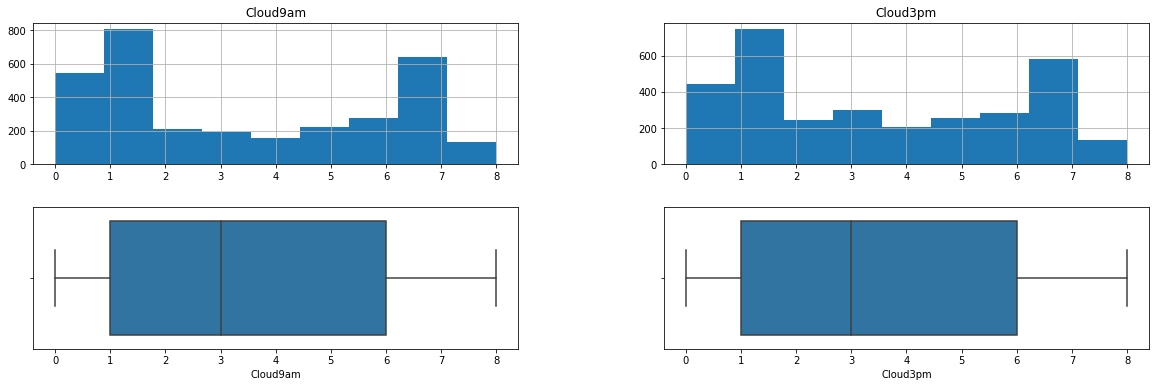

In [72]:
_, axes = plt.subplots(2, 2, figsize=(20, 6))

# selecting bins=9 to ensure one bar per value (0, 1/8, 2/8, ... , 8/8)
cloud_df.hist(ax=axes[0], bins=9)
sns.boxplot(ax=axes[1, 0], x=cloud_df['Cloud9am'])
sns.boxplot(ax=axes[1, 1], x=cloud_df['Cloud3pm'])

plt.show()

The most frequent occuring value for both attributes, *Cloud9am* and *Cloud3pm, is $1.0$.

In [73]:
cloud_df['Cloud9am'].value_counts()

1.0    805
7.0    643
0.0    544
6.0    277
5.0    226
2.0    211
3.0    195
4.0    157
8.0    133
Name: Cloud9am, dtype: int64

In [74]:
cloud_df['Cloud3pm'].value_counts()

1.0    744
7.0    581
0.0    443
3.0    298
6.0    284
5.0    254
2.0    245
4.0    206
8.0    134
Name: Cloud3pm, dtype: int64

# __2.1.14 Temperature

📙 **SUMMARY**
* The *Temp9am* and *Temp3pm* data represents the temperature recorded at their respective time and is expressed in $\circ C$. The values are rounded to the nearest tenth of a decimal.

* **Temp9am**
    * The values range from $5.6 ^\circ C$ to $39.0 ^\circ C$ with a standar deviation of $18.57 ^\circ C$ and a standard deviation of $5.35 ^\circ C$.
    * There are no missing values.
    * The data is distributed normally and is symmetric.
    * There are $5$ outlier data points.
    
* **Temp3pm**
    * The values range from $8.4 ^\circ C$ to $42.5 ^\circ C$ with a standar deviation of $23.46 ^\circ C$ and a standard deviation of $5.87 ^\circ C$.
    * There is only $1$ missing value.
    * The data distribution is positively skewed at `skewness` = $0.60$.
    * There are $12$ outlier data points.

The temperature is expressed in $^\circ C$ and are rounded to the nearest tenth of a decimal.

In [75]:
temperature_df = df[['Temp9am', 'Temp3pm']]
temperature_df.head()

,Temp9am,Temp3pm
120638,8.5,18.1
120639,11.1,19.7
120640,12.1,17.7
120641,13.2,17.7
120642,15.9,16.0


The *Temp9am* values range from $5.6$ to $39.0$ with a mean of $18.57$ and a standard deviation of $5.35$.

The *Temp3pm* values range from $8.4$ to $42.5$ with a mean of $23.46$ and a standard deviation of $5.87$.

In [76]:
temperature_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temp9am,3193.0,18.573598,5.34664,5.6,14.5,18.3,22.3,39.0
Temp3pm,3192.0,23.461748,5.86863,8.4,18.9,22.5,27.3,42.5


There is only $1$ missing value for *Temp3pm* and none for*Temp9am*.

In [77]:
missing_temperature_values = temperature_df.isna().sum()
missing_temperature_perc = missing_temperature_values / len(temperature_df)

print(f"Temp9AM missing values: {missing_temperature_values['Temp9am']} ({missing_temperature_perc['Temp9am']:.3f}%)")
print(f"Temp3PM missing values: {missing_temperature_values['Temp3pm']} ({missing_temperature_perc['Temp3pm']:.3f}%)")

Temp9AM missing values: 0 (0.000%)
Temp3PM missing values: 1 (0.000%)


The datasets are normally distributed. The dataset for *Temp3PM* is positively skewed at `skewness` = $0.60$. Both datasets have outliers on the rear end.

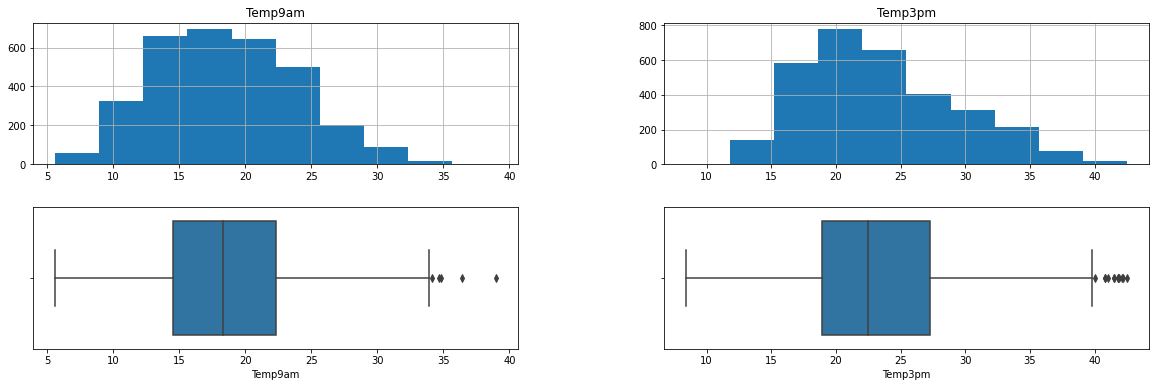

In [78]:
_, axes = plt.subplots(2, 2, figsize=(20, 6))

temperature_df.hist(ax=axes[0])
sns.boxplot(ax=axes[1,0], x=temperature_df['Temp9am'])
sns.boxplot(ax=axes[1,1], x=temperature_df['Temp3pm'])

plt.show()

In [79]:
temperature_skewness = temperature_df.skew()

print(f"Temp9AM skewness: {temperature_skewness['Temp9am']:.2f}")
print(f"Temp3PM skewness: {temperature_skewness['Temp3pm']:.2f}")

Temp9AM skewness: 0.31
Temp3PM skewness: 0.60


For *Temp9am*, there are $5$ outlier data points, each with unique values.

For *Temp3pm*, there are $12$ outlier data points but only $9$ unique values.

In [80]:
identify_outliers(temperature_df, 'Temp9am')

Number of outlier data points (Temp9am): 5
Unique value count: (5 unique values)
Outliers counts:
  34.8 	 1 occurrence(s)
  36.4 	 1 occurrence(s)
  39.0 	 1 occurrence(s)
  34.7 	 1 occurrence(s)
  34.1 	 1 occurrence(s)


In [81]:
identify_outliers(temperature_df, 'Temp3pm')

Number of outlier data points (Temp3pm): 12
Unique value count: (9 unique values)
Outliers counts:
  41.8 	 2 occurrence(s)
  40.8 	 2 occurrence(s)
  41.5 	 2 occurrence(s)
  42.2 	 1 occurrence(s)
  40.0 	 1 occurrence(s)
  41.9 	 1 occurrence(s)
  42.5 	 1 occurrence(s)
  41.0 	 1 occurrence(s)
  42.1 	 1 occurrence(s)


# __2.1.15 RainToday


📙 **SUMMARY**
* The *RainToday* attribute denotes whether it rained today or not. The values are categorical and could either **Yes** or **No**.
* There are no missing values in this dataset.
* The **No** value occurs $4$x more than the **Yes** value.

The *RainToday* is a categorical attribute indicating whether it rained today or not. It could be **Yes** or **No**.

In [82]:
rain_today_df = df[['RainToday']]
rain_today_df.head(10)

,RainToday
120638,No
120639,No
120640,No
120641,Yes
120642,Yes
120643,Yes
120644,No
120645,No
120646,Yes
120647,Yes


There are no missing values for this attribute.

In [83]:
missing_rain_today_count = rain_today_df.isna().sum()

print(f"RainToday missing values: {missing_rain_today_count['RainToday']}")

RainToday missing values: 0


For this attribute, the **No** values comprise to $80\%$ - $4$ times as much as the **Yes** values ($20\%$).

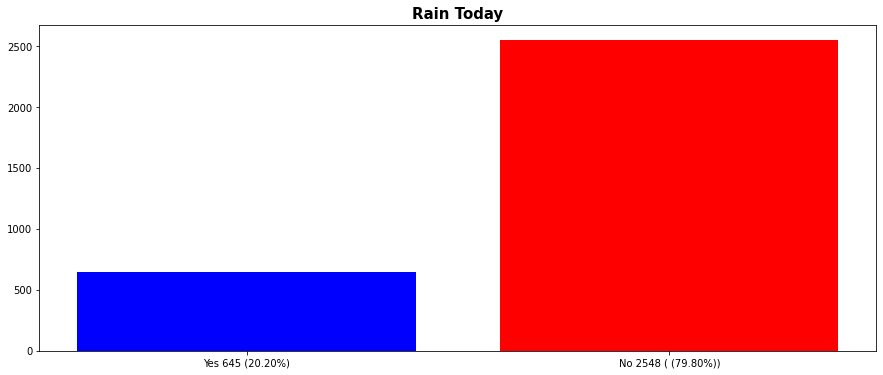

In [84]:
plt.figure(figsize=(15, 6))

rain_today_count = rain_today_df.value_counts()
rain_today_count_perc = rain_today_count / len(rain_today_df)

plt.title("Rain Today", fontweight="bold", fontsize=15)
plt.bar(f"Yes {rain_today_count['Yes']} ({rain_today_count_perc['Yes']*100:.2f}%)", rain_today_count["Yes"], color="blue")
plt.bar(f"No {rain_today_count['No']} ( ({rain_today_count_perc['No']*100:.2f}%))", rain_today_count["No"], color="red")
plt.show()

# _2.2 Bivariate Analysis


📙 **SUMMARY**
* The **categorical** attributes highly correlated with *Rainfall* using the **correlation ratio** ($\eta$) are:
    * *Sunshine* $(eta = 0.528)$, and
    * *Humidity3pm* $(eta = 0.508)$.
* The **nominal** attributes highly correlated with *Rainfall* using **Cramer's V** ($\varphi_c$) are:
    * *WindDir9am* $(\varphi_c = 0.499)$, 
    * *WindDir3pm* $(\varphi_c = 0.482)$, and
    * *WindGustDir* $(\varphi_c = 0.475)$.

# _2.2.1 Continuous variables against the target
Below is the analysis to determine if any of the numerical features have an impact to the *RainTomorrow classification.

In [85]:
cont_df = df[[
    'MinTemp',
    'MaxTemp', 
    'Rainfall', 
    'Evaporation',
    'Sunshine',
    'WindGustSpeed',
    'WindSpeed9am',
    'WindSpeed3pm', 
    'Humidity9am',
    'Humidity3pm',
    'Pressure9am',
    'Pressure3pm',
    'Temp9am',
    'Temp3pm'
]]
cont_df.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
120638,2.7,18.8,0.0,0.8,9.1,20.0,0.0,7.0,97.0,53.0,1027.6,1024.5,8.5,18.1
120639,6.4,20.7,0.0,1.8,7.0,22.0,6.0,9.0,80.0,39.0,1024.1,1019.0,11.1,19.7
120640,6.5,19.9,0.4,2.2,7.3,31.0,0.0,4.0,84.0,71.0,1016.8,1015.6,12.1,17.7
120641,9.5,19.2,1.8,1.2,4.7,26.0,11.0,6.0,93.0,73.0,1019.3,1018.4,13.2,17.7
120642,9.5,16.4,1.8,1.4,4.9,44.0,13.0,17.0,69.0,57.0,1020.4,1022.1,15.9,16.0
120643,0.7,15.9,6.8,2.4,9.3,24.0,4.0,7.0,86.0,41.0,1032.0,1029.6,6.9,15.5
120644,0.7,18.3,0.0,0.8,9.3,37.0,15.0,13.0,72.0,36.0,1028.9,1024.2,8.7,17.9
120645,3.2,20.4,0.0,1.4,6.9,24.0,9.0,13.0,58.0,42.0,1023.9,1021.1,10.2,19.3
120646,9.8,19.5,8.0,1.2,2.5,31.0,0.0,9.0,97.0,64.0,1026.4,1024.9,12.1,18.7
120647,11.2,20.4,4.6,2.8,1.7,46.0,19.0,11.0,79.0,50.0,1020.2,1014.0,13.4,19.0


Below are the distribution of each continuous variable divided between the $2$ possible values of the target variable, *RainTomorrow*. 

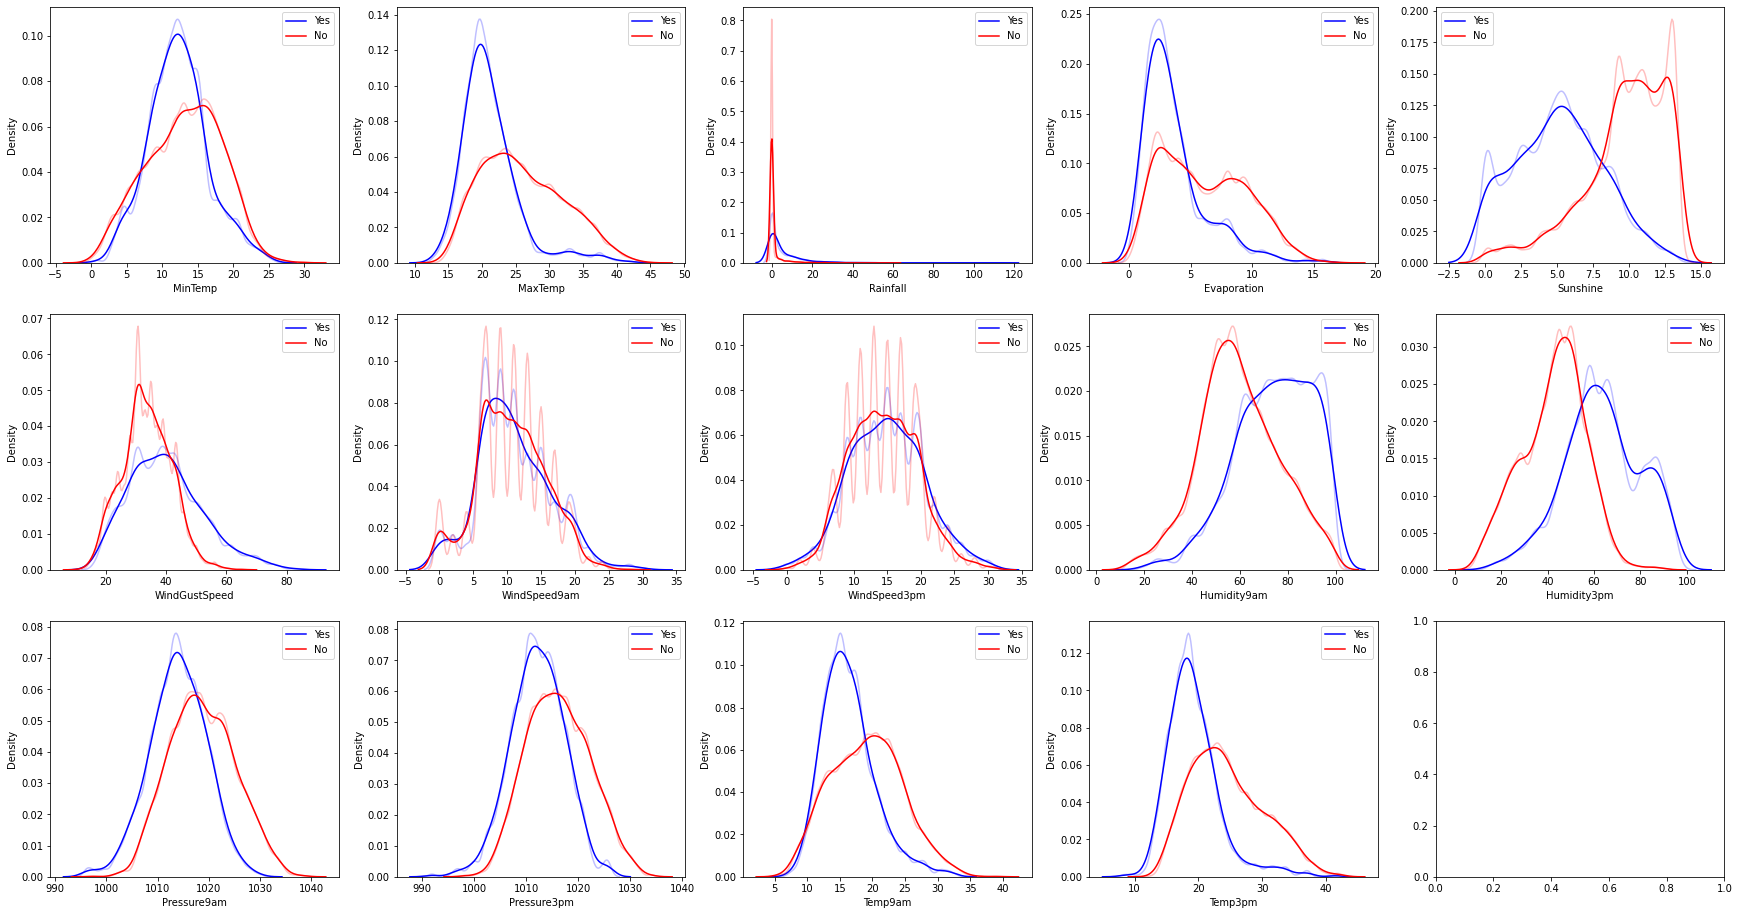

In [86]:
row_count = 3
col_count = 5
_, axes = plt.subplots(row_count,col_count, figsize=(30,16))
for i, col in enumerate(cont_df.columns):
    row_i = i // col_count
    col_i = i % col_count
    
    sns.kdeplot(df[col][df['RainTomorrow'] == 'Yes'], bw_adjust=0.5, 
                ax=axes[row_i, col_i], color='blue', alpha=0.25)
    sns.kdeplot(df[col][df['RainTomorrow'] == 'Yes'],
                ax=axes[row_i, col_i], color='blue', label='Yes')
    
    sns.kdeplot(df[col][df['RainTomorrow'] == 'No'], bw_adjust=0.5, 
                ax=axes[row_i, col_i], color='red',  alpha=0.25)
    sns.kdeplot(df[col][df['RainTomorrow'] == 'No'], 
                ax=axes[row_i, col_i], color='red',  label='No')
    
    axes[row_i, col_i].legend()
    
plt.show()

The [correlation ratio $\eta$](http://https://en.wikipedia.org/wiki/Correlation_ratio) is used to measure the correlation between the continuous variable and the target variable (categorical). 

The $\eta$ value ranges from $0$to $1$ with $0$ indicating no correlation and $1$ indicating otherwse. 

In [87]:
def eta(df, col, target):
    total_mean = df[col].mean()
    numerator = 0
    denominator = 0
    for category in df[target].unique():
        cat_data = df[df[target] == category][col]

        cat_count = len(cat_data)
        cat_average = cat_data.mean()
        numerator += cat_count * np.sum(np.square(cat_average - total_mean))
        
        denominator += np.sum(np.square(cat_data - total_mean))
        
    return np.power(numerator/denominator, 0.5)

From the heatmap shown below, *Sunshine* and *Humidity3pm* seem to have the most correlation towards the *RainTomorrow* category.

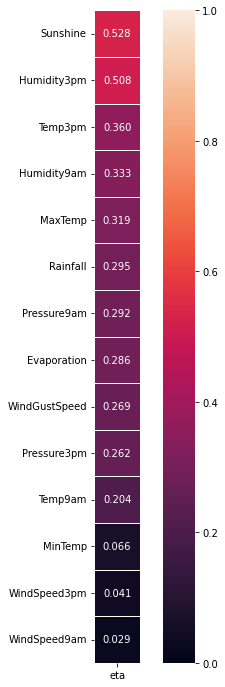

In [88]:
etas = pd.DataFrame({ 'eta': [eta(df, col, 'RainTomorrow') for col in cont_df.columns] },
                    index=cont_df.columns)
etas.sort_values('eta', ascending=False, inplace=True)

plt.figure(figsize=(8,12))
sns.heatmap(etas, vmin=0.0, vmax=1.0, annot=True, fmt=".3f", square=True, linewidth=0.5)
plt.show()

# _2.2.2 Nominal variables against the target
Below is the analysis to determine if any of the nominal features have an impact to the *RainTomorrow classification.

For the nominal attributes, we've *excluded* the *Date* feature as it is an identifying key - it is unique per record. We *included* *Cloud9am* and *Cloud3pm* attributes as they are discrete variables ranging from $0$ to $8$.

In [89]:
nom_df = df[[
    'RainToday',
    'WindGustDir',
    'WindDir9am',
    'WindDir3pm',
    'Cloud9am',
    'Cloud3pm',
]]

nom_df.head(10)

,RainToday,WindGustDir,WindDir9am,WindDir3pm,Cloud9am,Cloud3pm
120638,No,ENE,NaN,E,2.0,3.0
120639,No,NE,ESE,ENE,0.0,6.0
120640,No,NE,NaN,WNW,1.0,3.0
120641,Yes,W,NNE,NNW,6.0,6.0
120642,Yes,WSW,W,SW,7.0,5.0
120643,Yes,NNE,ENE,NE,0.0,1.0
120644,No,N,NE,NNE,1.0,5.0
120645,No,NNW,NE,N,6.0,5.0
120646,Yes,ESE,NaN,ESE,7.0,6.0
120647,Yes,NNW,NE,NNE,7.0,7.0


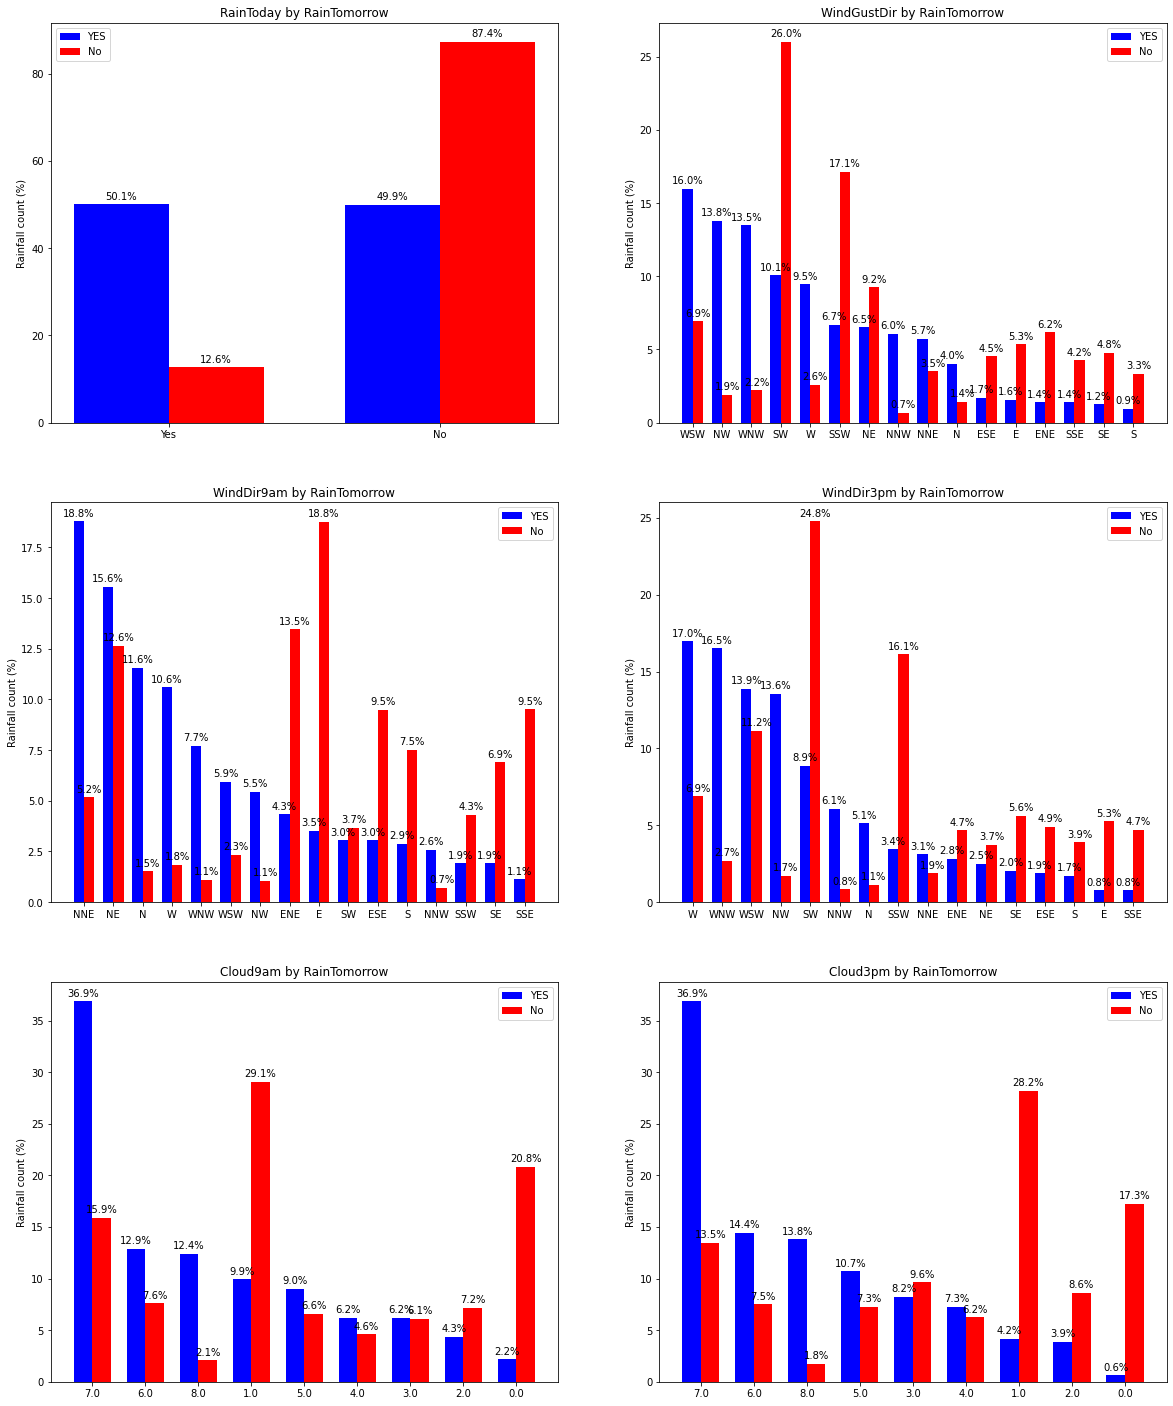

In [90]:
def combined_bar_plot(ax, df, col, target):
    unique_values = df[col].dropna().unique()
    X = np.arange(len(unique_values))
    
    yes_target_df = df[df['RainTomorrow'] == 'Yes'][col]
    yes_target_df_count = pd.DataFrame(yes_target_df.value_counts())
    yes_target_df_count.rename(columns={col: 'Yes'}, inplace=True)
    
    no_target_df = df[df['RainTomorrow'] == 'No'][col]
    no_target_df_count = pd.DataFrame(no_target_df.value_counts())
    no_target_df_count.rename(columns={col: 'No'}, inplace=True)
    
    target_df_count = yes_target_df_count.join(no_target_df_count)
    # normalize to percentages
    target_df_count['Yes_perc'] = target_df_count['Yes'] / target_df_count['Yes'].sum() * 100
    target_df_count['No_perc'] = target_df_count['No'] / target_df_count['No'].sum() * 100
    
    yes_rects = ax.bar(X, target_df_count['Yes_perc'], width=0.35, label='YES', color='blue')
    ax.bar_label(yes_rects, padding=3, fmt="%.1f%%")
    no_rects = ax.bar(X+0.35, target_df_count['No_perc'], width=0.35, label='No', color='red')
    ax.bar_label(no_rects, padding=3, fmt="%.1f%%")
    
    ax.set_xticks(X + .175, target_df_count.index)
    ax.set_title(f"{col} by RainTomorrow")
    ax.set_ylabel("Rainfall count (%)")
    ax.legend()

col_count = 2
row_count = len(nom_df.columns) // col_count
fig, ax = plt.subplots(row_count, col_count, figsize=(20, 25))
for idx, column in enumerate(nom_df.columns):
    row_idx = idx // col_count
    col_idx = idx % col_count
    combined_bar_plot(ax[row_idx, col_idx], df, column, 'RainTomorrow')
plt.show()

Using **Cramer's V**, the highly correlated nominal attributes to *Rainfall* are *WindDir9am*, *WindDir3pm*, and *WindGustDir* with values > $0.45$.

In [91]:
from scipy.stats.contingency import association

def cramers_v(df, col, target):
    crosstab = pd.crosstab(df[target], df[col]).to_dict()
    contingency_table = np.array([[count for _,count in v1.items()] \
                                  for _,v1 in crosstab.items() ])
    return association(contingency_table, method='cramer')

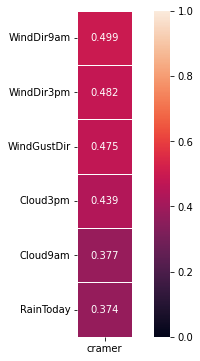

In [92]:
cramers = pd.DataFrame({ 'cramer' : [cramers_v(df, col, 'RainTomorrow') for col in nom_df.columns] },
            index=nom_df.columns)
cramers.sort_values('cramer', ascending=False, inplace=True)

plt.figure(figsize=(8, 6))
sns.heatmap(cramers, vmin=0.0, vmax=1.0, annot=True, fmt='.3f', square=True, linewidth=0.5)
plt.show()

# 3. Feature Engineering

Allocate $20\%$ of the dataset as test set and the remaining $80\%$ as training set.

In [93]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print(f"Train set count: {len(X_train)}")
print(f"Test set count: {len(X_test)}")

Train set count: 2554
Test set count: 639


The classes on the train set and test set should be checked to ensure that the ratio between the `Yes` and `No` class labels are similar.

In [94]:
pd.DataFrame({
    "Yes": [
        len(y_train[y_train == 'Yes'])/len(y_train), 
        len(y_train[y_train == 'Yes'])/len(y_train), 
        len(y[y == 'Yes'])/len(y)],
    "No": [
        len(y_test[y_test == 'No'])/len(y_test),
        len(y_test[y_test == 'No'])/len(y_test),
        len(y[y == 'No'])/len(y)]
}, index=['Train', 'Test', 'Overall'])

,Yes,No
Train,0.203211,0.802817
Test,0.203211,0.802817
Overall,0.202004,0.797996



---------------------------------------------------------------------------------------

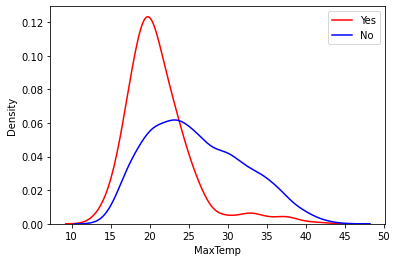

In [95]:
sns.kdeplot(df['MaxTemp'][df['RainTomorrow'] == 'Yes'], color='red', label='Yes')
sns.kdeplot(df['MaxTemp'][df['RainTomorrow'] == 'No'], color='blue', label='No')
plt.legend()
plt.show()

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

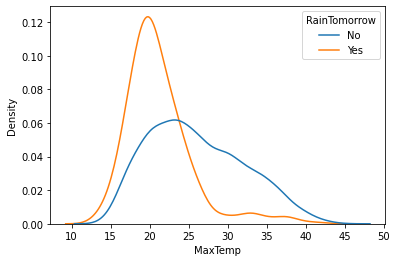

In [96]:
sns.kdeplot(data=df, x='MaxTemp', hue='RainTomorrow', common_norm=False)

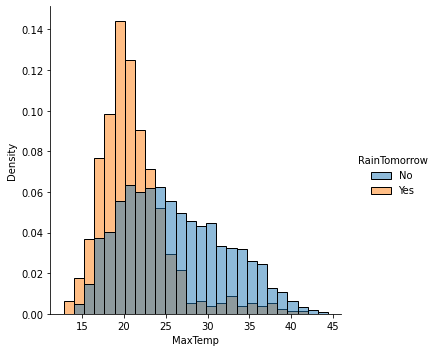

In [97]:
sns.displot(df, x='MaxTemp', hue='RainTomorrow', stat='density', common_norm=False)

In [98]:
df_corr = df.corr()

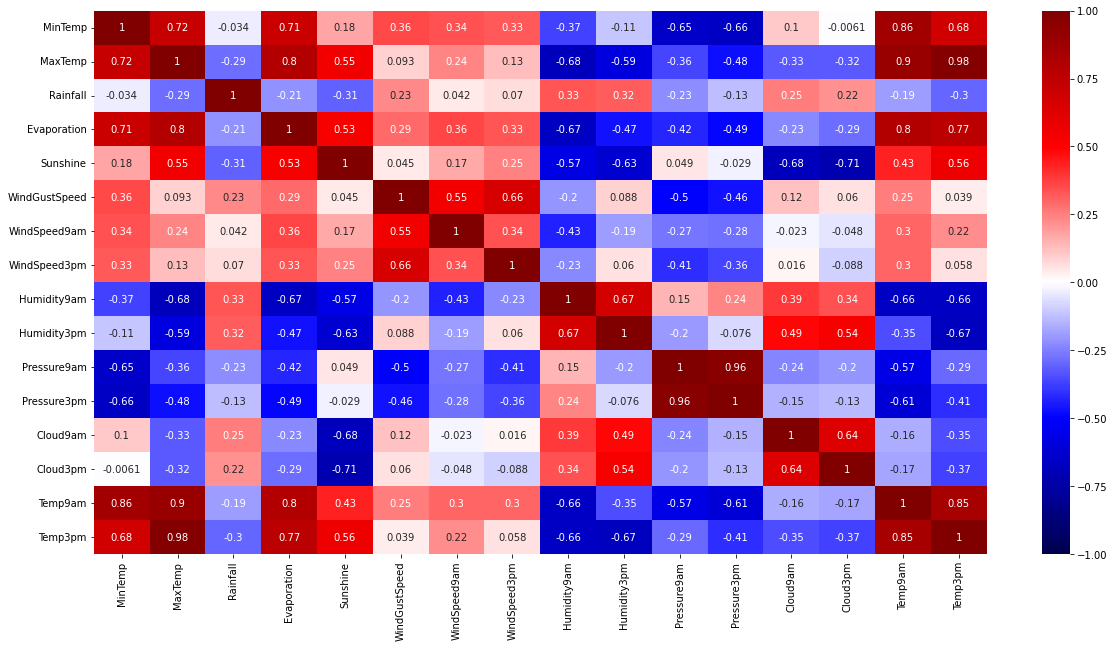

In [99]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, annot=True, cmap="seismic", vmin=-1.0, vmax=1.0)
plt.show()

In [100]:
# sns.pairplot(df, hue='RainTomorrow')

In [101]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [102]:
# x = df[['MaxTemp', 'MinTemp', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']]
# g = sns.PairGrid(x, diag_sharey=False)
# g.map_diag(sns.kdeplot, lw=2)
# g.map_upper(sns.scatterplot, s=15)
# g.map_lower(sns.kdeplot)
# plt.show()